#### Importing Dependencies

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#### Loading the Dataset

In [2]:
data = pd.read_csv('final.csv')
Date = data.Date
data.drop('Unnamed: 0',axis=1, inplace=True) 

data.drop(['Date'], axis=1, inplace=True)

X = data.iloc[:,:-1]
y = data.Close

#### Scaling the Data

In [3]:
X = scale(X, with_mean=True)
y = scale(y, with_mean=False, with_std=False)

#### Splitting the Dataset

In [4]:
splitRatio = 0.8
X_train = X[:int(X.shape[0]*splitRatio)]
X_test = X[int(X.shape[0]*splitRatio):]
y_train = y[:int(X.shape[0]*splitRatio)]
y_test = y[int(X.shape[0]*splitRatio):]

### Support Vector Machines

In [5]:
# giving parameters to the svm
parameters = {
    'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
    'C': [0.5,1,10],
}

In [6]:
#dafualt values
model = SVR()
model.fit(X_train, y_train)

SVR()

In [7]:
#base model
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1459.5453397284305

In [8]:
## hyperparameter tuning 
svr_model = SVR()
clf = GridSearchCV(svr_model, parameters)

clf.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.5, 1, 10],
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [9]:
clf.best_estimator_

SVR(C=10, kernel='linear')

In [10]:
model = SVR(C=10, kernel='linear')
model.fit(X_train, y_train)


SVR(C=10, kernel='linear')

In [11]:
y_prediction = model.predict(X_test)

#### Assessing the metrics of the Model

In [20]:
print("Root mean squared Error: ", np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
print("R2 Score:",r2_score(y_prediction, y_test))

Root mean squared Error:  37.31256180574233
R2 Score: 0.9833082794689089


Text(0.5, 1.0, 'Testing Vs Predicted Closing Values using SVM')

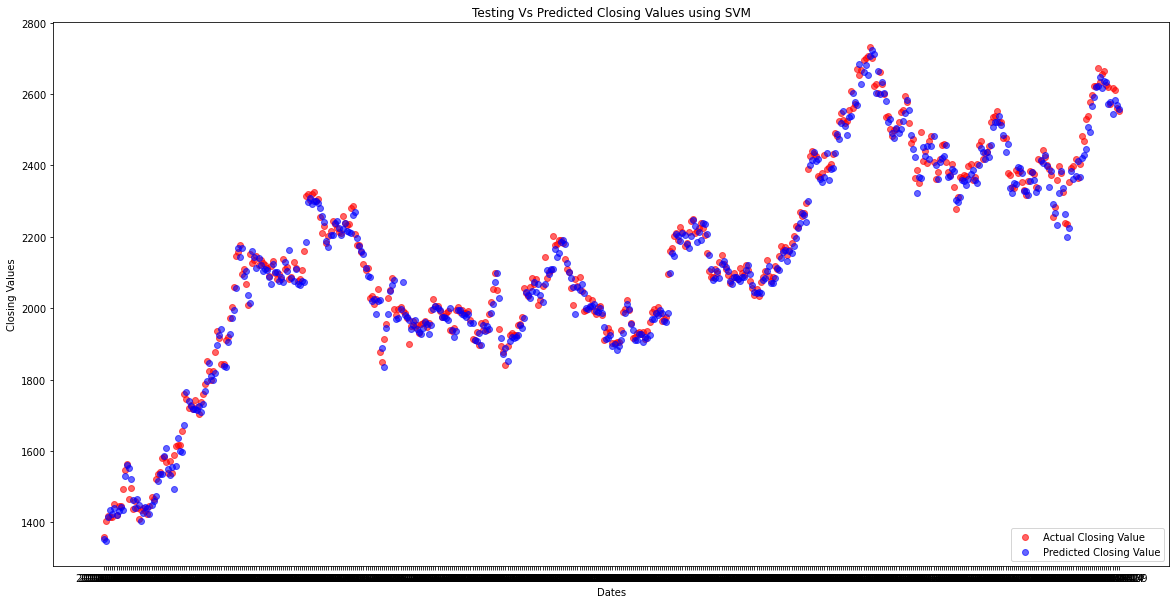

In [13]:
# plotting the results
plt.figure(figsize=(20,10))
plt.scatter(Date[:494], y_test, c='r', alpha=0.6, label='Actual Closing Value')
plt.scatter(Date[:494], y_prediction, c='b', alpha=0.6, label='Predicted Closing Value')
plt.xlabel('Dates')
plt.ylabel('Closing Values')
plt.legend(loc='lower right')
plt.title('Testing Vs Predicted Closing Values using SVM')

## Random Forest 

In [17]:
model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, y_train)


RandomForestRegressor()

In [18]:
RFR_preds = model.predict(X_test)

#### Assessing the parameters of the Model

In [19]:
print("Root mean squared Error: ",np.sqrt(mean_squared_error(y_test, RFR_preds)))
print("R2 Score:",r2_score(RFR_preds, y_test))

Root mean squared Error:  37.31256180574233
R2 Score: 0.9833082794689089


Text(0.5, 1.0, 'Testing Vs Predicted Closing Values using Random Forest')

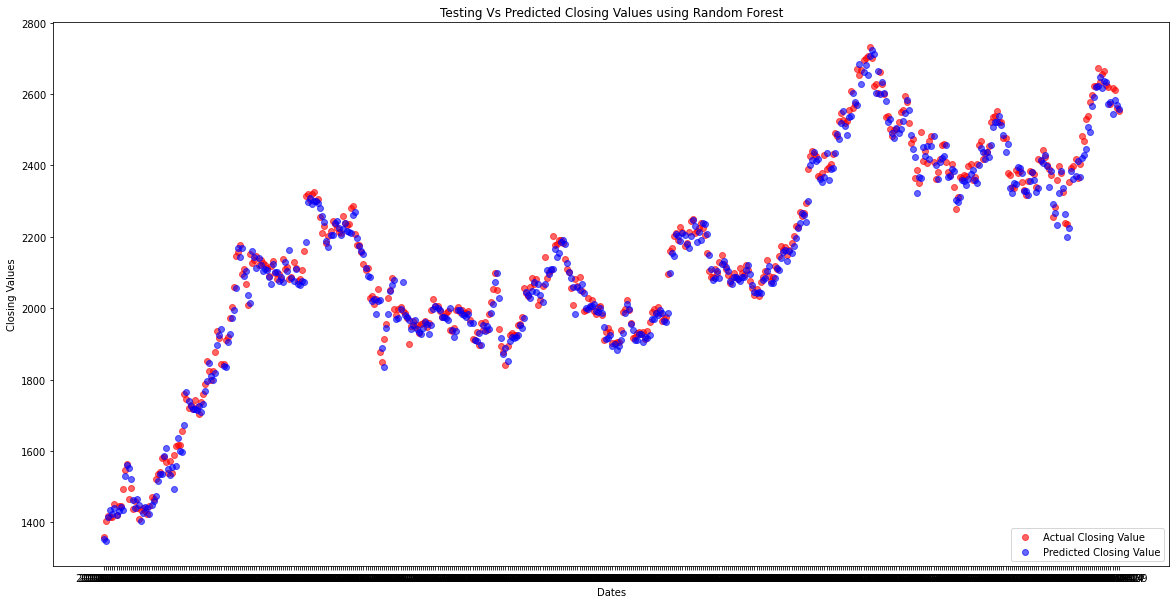

In [31]:
plt.figure(figsize=(20,10))
plt.scatter(Date[:494], y_test, c='r', alpha=0.6, label='Actual Closing Value')
plt.scatter(Date[:494], RFR_preds, c='b', alpha=0.6, label='Predicted Closing Value')
plt.xlabel('Dates')
plt.ylabel('Closing Values')
plt.legend(loc='lower right')
plt.title('Testing Vs Predicted Closing Values using Random Forest')